# Xây dựng mô hình dự đoán bệnh tim mạch sử dụng mô hình Máy học (Machine Learning)

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model đánh giá mô hình
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

In [4]:
df = pd.read_csv('heart-disease.csv')
print(df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

Các đặc trưng(feature) của bộ dữ liệu : 
1. Age : Độ tuổi
2. Sex : Giới tính
    - 0 : Nữ
    - 1 : Nam   
3. Cp (Chest Pain type): Loại đau ngực (giá trị từ 0 đến 3):
    - 0: Đau thắt ngực điển hình (typical angina)
    - 1: Đau thắt ngực không điển hình (atypical angina)
    - 2: Đau không do tim (non-anginal pain)
    - 3: Không có triệu chứng (asymptomatic)
4. Trestbps(Resting Blood Presure): Huyết áp lúc nghỉ ngơi (đơn vị mm Hg), được đo khi nhập viện
5. Chol : Lượng cholesterol trong máu (đơn vị mg/dL)
6. Fbs  : Đường huyết lúc đói > 120 mg/dL (1 = True, 0 = False)
7. Restecg : Kết quả đo điện tâm đồ khi nghỉ ngơi (giá trị từ 0 đến 2):
    - 0 : Bình thường
    - 1 : ..
    - 2 : ..
8. Thalach : Nhịp tim tối đa đạt được trong một bài kiểm tra gắng sức
9. Exang   : Đau thắt ngực gây ra do vận động (1 = Yes, 0 = No)
10. Oldpeak: Độ giảm ST trong ECG do vận động, so với khi nghỉ ngơi
11. Slope  : Độ dốc của đoạn ST trong ECG lúc đạt đỉnh (giá trị từ 0 đến 2):
    - 0: Up-sloping (dốc lên)
    - 1: Flat (bằng phẳng)
    - 2: Down-sloping (dốc xuống)
.....
13. Target : Biến mục tiêu (1 = Có bệnh tim, 0 = Không có bệnh tim)

In [6]:
# Kiểm tra xem có bao nhiêu dòng
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
# Kiểm tra tính tổng quát của dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# Kiểm tra tỉ lệ giữa người có bệnh và không bệnh
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

Text(0, 0.5, 'Số lượng')

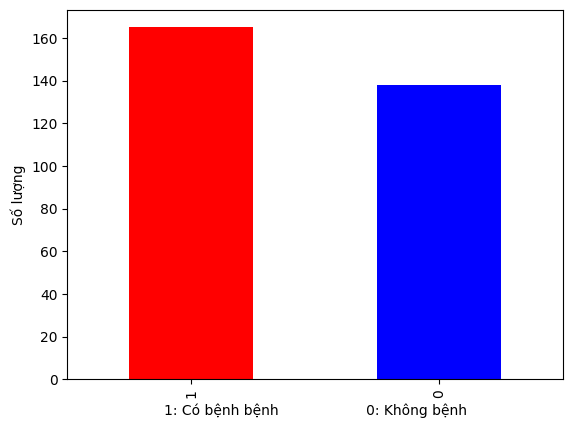

In [13]:
df['target'].value_counts().plot.bar(color=['red','blue'])
plt.xlabel('1: Có bệnh bệnh                    0: Không bệnh')
plt.ylabel('Số lượng')

In [17]:
# Tổng quát hóa dữ liệu
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [18]:
df['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [19]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [32]:
female_disease = 72 / 96
male_disease = 93 / 207
print('Tỉ lệ mắc bệnh tim mạch:\nNam: %.2f\nNữ: %.2f' % (male_disease, female_disease))


Tỉ lệ mắc bệnh tim mạch:
Nam: 0.45
Nữ: 0.75


([<matplotlib.axis.XTick at 0x1e45888e6d0>,
 [Text(0, 0, 'Nữ'), Text(1, 0, 'Nam')])

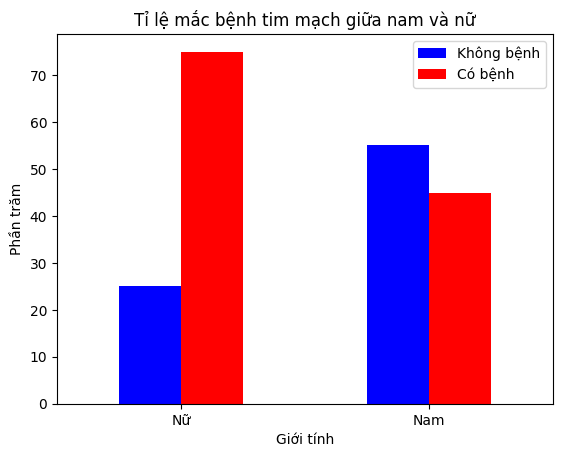

In [35]:
# Tạo bảng tần số giao nhau
crosstab = pd.crosstab(df['sex'], df['target'])

# Tính tỉ lệ phần trăm
crosstab_percentage = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

# Vẽ biểu đồ
crosstab_percentage.plot(kind='bar', color=['blue', 'red'])

plt.title('Tỉ lệ mắc bệnh tim mạch giữa nam và nữ')
plt.xlabel('Giới tính')
plt.ylabel('Phần trăm')
plt.legend(['Không bệnh', 'Có bệnh'])
plt.xticks(ticks=[0, 1], labels=['Nữ', 'Nam'], rotation=0)

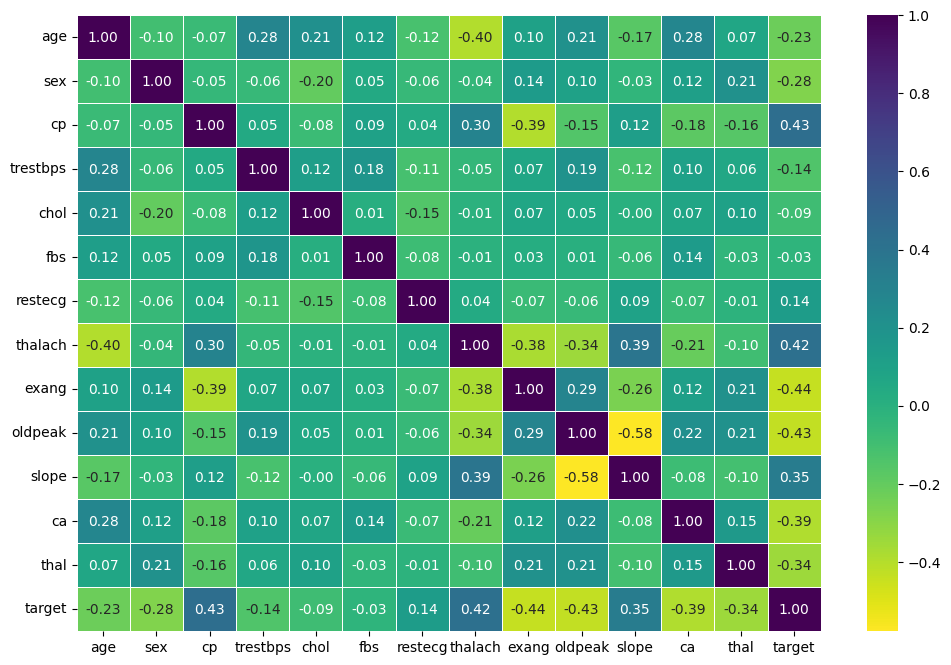

In [36]:
# visualization
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, linewidth=0.5, fmt='.2f', cmap='viridis_r');

# Xây dựng mô hình


In [37]:
# split features and labels
X = df.drop('target', axis=1)
y = df['target']

In [38]:
# split into training, testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [40]:

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'RandomForestClassifer': RandomForestClassifier()
}

# create function to fit and score model
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evalute given machine learning models.
    models: a dictionary of different scikit learn machine learning models
    X_train: training date (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test : testing labels
    returns model scores dictionary.
    """
    
    np.random.seed(42)
    model_scores = {}
    

    for model_name, model in models.items():
        model.fit(X_train, y_train) # fit model
        score = model.score(X_test, y_test) # get score
        model_scores[model_name] = score # put score for each model
        
    return model_scores        

In [41]:
# fit and score
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

model_scores

{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForestClassifer': 0.8360655737704918}

In [42]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])

model_compare.head()

,LogisticRegression,KNN,RandomForestClassifer
accuracy,0.885246,0.688525,0.836066


In [43]:
# create hyperparameter grid for Logistic Regression
log_reg_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']
}

# set up grid hyperparameter search for Logistic Regression
gs_log_reg = GridSearchCV(LogisticRegression(), 
                                          log_reg_grid, 
                                          cv=5, 
                                          verbose=True)

# train the model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [44]:
# get best parameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [45]:
# get the score
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [46]:
# make predictions
y_preds = gs_log_reg.predict(X_test)

In [47]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [48]:
# create a new classifier with current best parameter
clf = LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [49]:
model = LogisticRegression(C=0.23357214690901212, solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [50]:
# Match coef's of features to columns name
feature_dict = dict(zip(df.columns, list(model.coef_[0])))

feature_dict

{'age': 0.00369922271969309,
 'sex': -0.9042409571824147,
 'cp': 0.6747282417003583,
 'trestbps': -0.01161339887501955,
 'chol': -0.0017036434876667307,
 'fbs': 0.04787687234653053,
 'restecg': 0.3349020564037549,
 'thalach': 0.024729381484044546,
 'exang': -0.6312041160762268,
 'oldpeak': -0.575909845192967,
 'slope': 0.4709515998265588,
 'ca': -0.6516534466903441,
 'thal': -0.6998421437724929}

In [51]:
def predict_Heart_Disease(age,sex,cp,trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal):    
    #loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = age
    x[1] = sex
    x[2] = cp
    x[3] = trestbps
    x[4] = chol
    x[5] = fbs
    x[6] = restecg
    x[7] = thalach
    x[8] = exang
    x[9] = oldpeak
    x[10] = slope
    x[11] = ca
    x[12] = thal
    #if loc_index >= 0:
       #x[loc_index] = 1

    return gs_log_reg.predict([x])[0]

In [52]:
predict_Heart_Disease(20, 1, 1, 100, 10, 0, 0, 250,0, 3, 2, 1 ,2 )

c:\Users\ROSA\miniconda3\envs\ryzenai\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


1